In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df[missing_value_df['percent_missing'] > 80]

,column_name,percent_missing
Alley,Alley,93.767123
PoolQC,PoolQC,99.520548
Fence,Fence,80.753425
MiscFeature,MiscFeature,96.301370


In [6]:
limitPer = len(df) * 0.20
df.dropna(thresh=limitPer, axis=1, inplace = True)

In [7]:
missing_value_df[missing_value_df['percent_missing'] != 0]['percent_missing'].sort_values(ascending = False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Name: percent_missing, dtype: float64

In [8]:
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace = True)

df['FireplaceQu'].fillna('NA', inplace = True)

df['GarageType'].fillna('No_Garage', inplace = True)

df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0], inplace = True)

df['GarageFinish'].fillna('No_Garage', inplace = True)

df['GarageCond'].fillna('No_Garage', inplace = True)

df['GarageQual'].fillna('No_Garage', inplace = True)
# dropping one of the column because from description, it sounds similar to garage Cond

df['BsmtExposure'].fillna('NA', inplace = True)

df['BsmtFinType2'].fillna('NA', inplace = True)

df['BsmtQual'].fillna('NA', inplace = True)

df['BsmtCond'].fillna('NA', inplace = True)

df['BsmtFinType1'].fillna('NA', inplace = True)

df['MasVnrType'].fillna('None', inplace = True)

df['MasVnrArea'].fillna(0, inplace = True)
# None is the type

df['Electrical'].fillna(df['Electrical'].mode()[0], inplace = True)

In [ ]:
        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [13]:
def num_to_str_col(col):
    '''
    Function to change the non ordinal columns to string columns
    '''
    if col == 20:
        return '1_STORY_1946_NEWER_ALL_STYLES'
    elif col == 30:
        return '1_STORY_1945_OLDER'
    elif col == 40:
        return '1_STORY_W_FINISHED_ATTIC_ALL_AGES'
    elif col == 45:
        return '1_1_2_STORY_UNFINISHED_ALL_AGES'
    elif col == 50:
        return '1_1_2_STORY_FINISHED_ALL_AGES'
    elif col == 60:
        return '2_STORY_1946_NEWER'
    elif col == 70:
        return '2_STORY_1945_OLDER'
    elif col == 75:
        return '2_1_2_STORY_ALL_AGES'
    elif col == 80:
        return 'SPLIT_OR_MULTI_LEVEL'
    elif col == 85:
        return 'SPLIT_OYER'
    elif col == 90:
        return 'DUPLEX_ALL_STYLES_AND_AGES'
    elif col == 120:
        return '1_STORY_PUD_Planned_Unit_Development_1946_NEWER'
    elif col == 150:
        return '1_1_2_STORY_PUD_ALL_AGES'
    elif col == 160:
        return '2_STORY_PUD_1946_NEWER'
    elif col == 180:
        return 'PUD_MULTILEVEL_INCL_SPLIT_LEV_FOYER'
    else:
        return 'FAMILY_CONVERSION_ALL_STYLES_AGES'

In [14]:
df['MSSubClass'] = df['MSSubClass'].apply(lambda x : num_to_str_col(x))

In [19]:
df.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Id


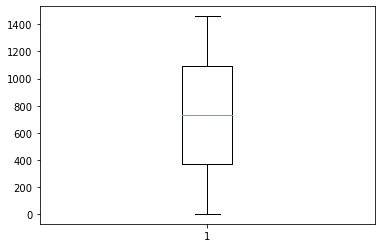

LotFrontage


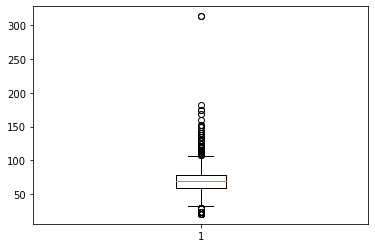

LotArea


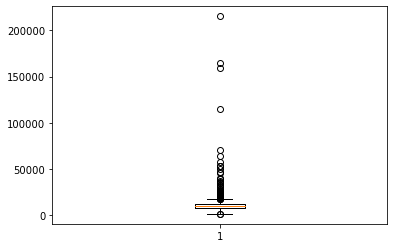

OverallQual


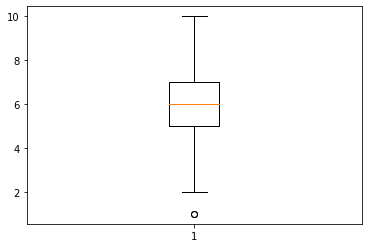

OverallCond


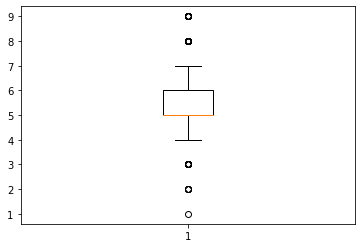

YearBuilt


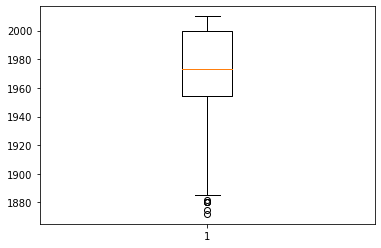

YearRemodAdd


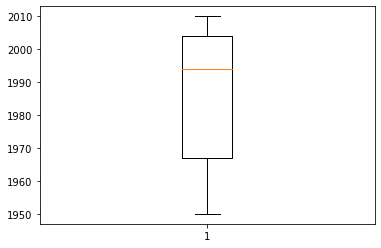

MasVnrArea


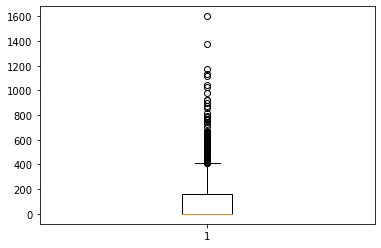

BsmtFinSF1


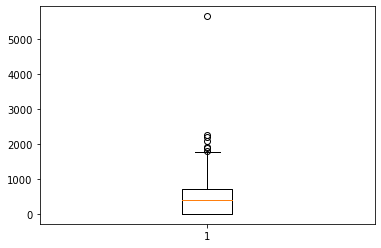

BsmtFinSF2


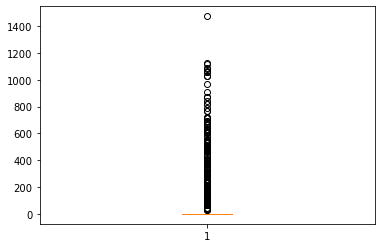

BsmtUnfSF


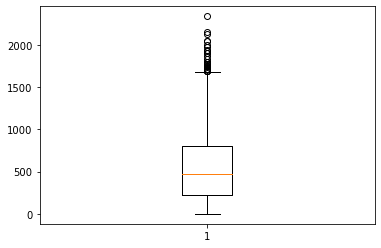

TotalBsmtSF


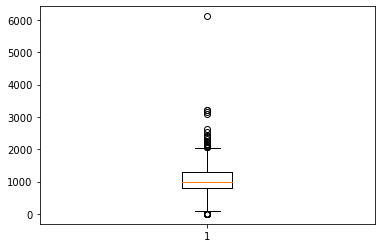

1stFlrSF


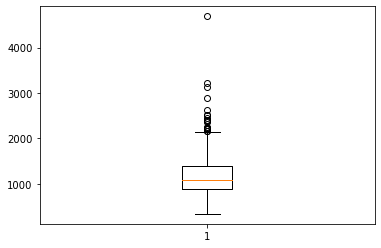

2ndFlrSF


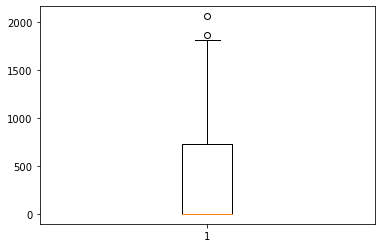

LowQualFinSF


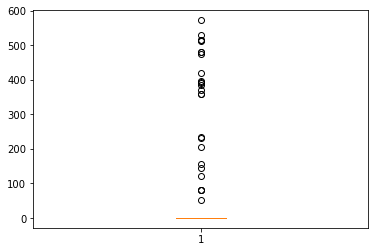

GrLivArea


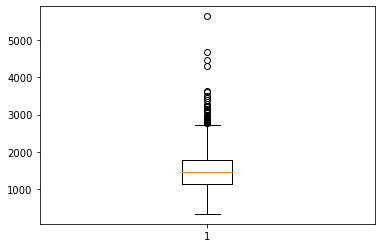

BsmtFullBath


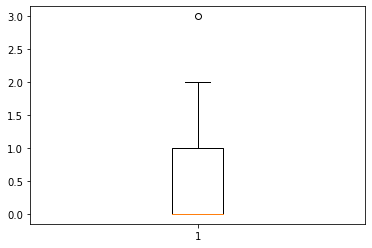

BsmtHalfBath


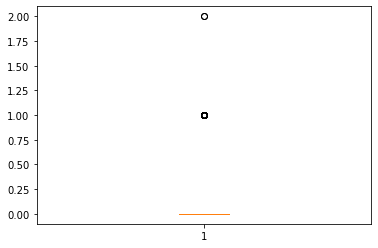

FullBath


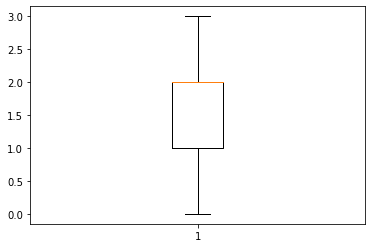

HalfBath


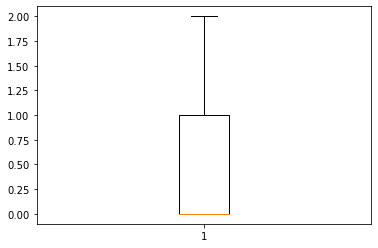

BedroomAbvGr


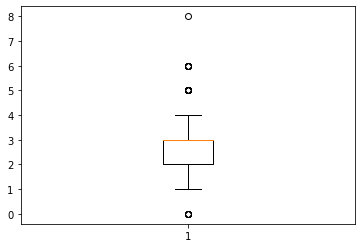

KitchenAbvGr


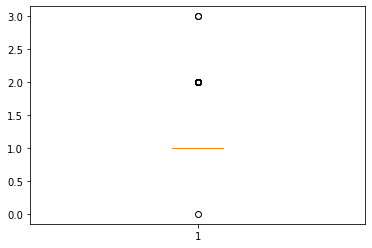

TotRmsAbvGrd


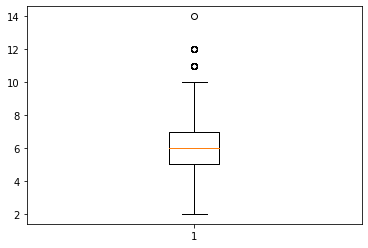

Fireplaces


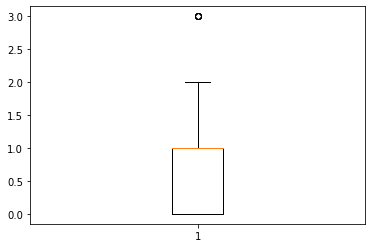

GarageYrBlt


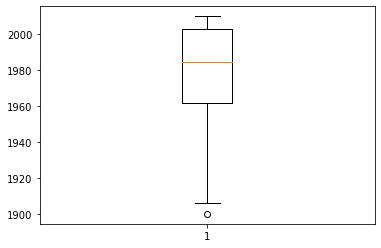

GarageCars


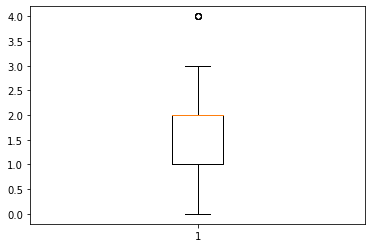

GarageArea


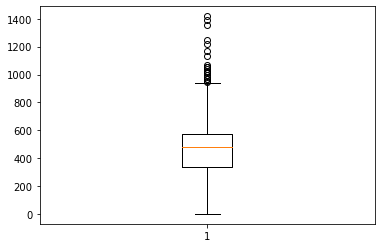

WoodDeckSF


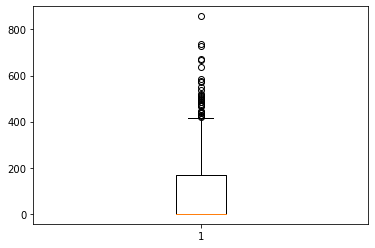

OpenPorchSF


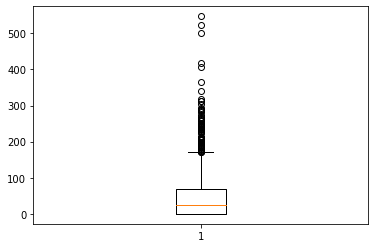

EnclosedPorch


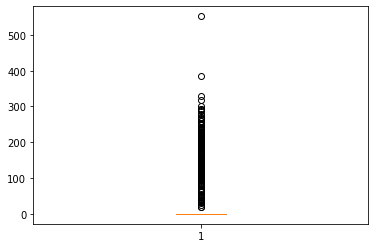

3SsnPorch


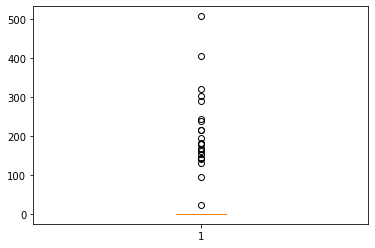

ScreenPorch


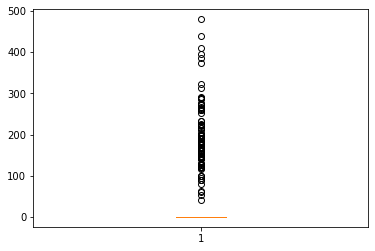

PoolArea


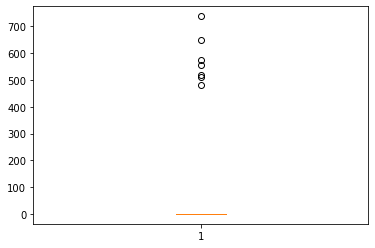

MiscVal


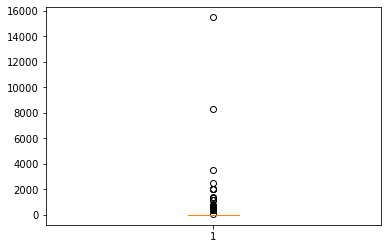

MoSold


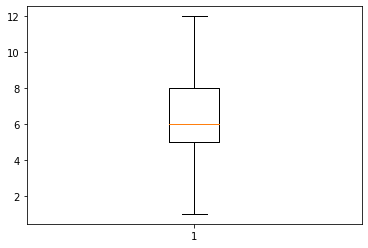

YrSold


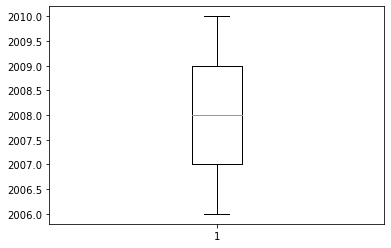

SalePrice


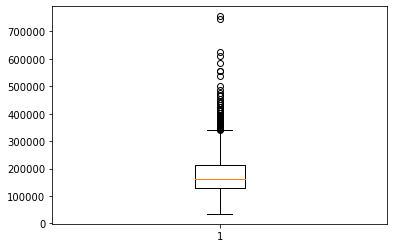

In [18]:
for i in df.describe().columns:
    print(i)
    plt.boxplot(df[i])
    plt.show()

In [ ]:
BsmtFinType2
BsmtFinSF2 - too many outliers
BsmtUnfSF

In [ ]:
LotFrontage
LotArea
# OverallCond -> ordinal
YearBuilt
MasVnrArea
BsmtFinSF1
# BsmtFinSF2 -> dropping too many outliers
TotalBsmtSF